# Lewis Hamilton v. Top Drivers

Lewis Hamilton is a six-time Forumla One World Champion and lightly regarded as the greatest Formula One Driver of all time. He won his first World Driver's Championship with McLaren in 2008 and then moved to Mercedes, where he proceeded to win his 5 remaining titles. The notebook will observe Hamilton in comparison to his competitors. What records and how many does he hold? How did he fare in races compared to other legends? Finally, is the driver or their car that decides success?

In [12]:
# import dependencies

import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import date
warnings.filterwarnings("ignore")

In [13]:
#read in csv's and create needed data frames

def getMiliSeconds(time):
    try:
        if '.' in time:
            x = datetime.datetime.strptime(time,'%M:%S.%f')
        elif ',' in time:
            x = datetime.datetime.strptime(time,'%M:%S,%f')
        else:
            x = datetime.datetime.strptime(time,'%M:%S:%f')
        return datetime.timedelta(minutes=x.minute,seconds=x.second, microseconds = x.microsecond).total_seconds()
    except:
        x = datetime.datetime.strptime(str(time).split('.')[0],'%M:%S:%f')
        return datetime.timedelta(minutes=x.minute,seconds=x.second, microseconds = x.microsecond).total_seconds()

def wins_per_year(driverRef, year):
    try:
        return topTenYears.loc[(topTenYears['driverRef'] == driverRef) & (topTenYears['positionOrder'] == 1) & (topTenYears['year'] == year)].groupby('driverId')['raceId'].count().values[0]
    except:
        return 0

def championsInYears(years, driverRef):
    total = []
    t = 0
    for year in years:
        winner = r.loc[r['year']== year].groupby('driverRef')['points'].sum().sort_values(ascending = False).index[0]
        if winner == driverRef:
            t = t + 1
        total.append(t)
    return total

df_races  = pd.read_csv('Resources/races.csv')
df_drivers = pd.read_csv('Resources/drivers.csv',encoding='latin1')
df_circuit = pd.read_csv('Resources/circuits.csv',encoding='latin-1')
df_constructors = pd.read_csv('Resources/constructors.csv',encoding='latin-1')
df_qualy = pd.read_csv('Resources/qualifying.csv',encoding='latin-1')
df_results = pd.read_csv('Resources/results.csv',encoding='latin-1')
df_status = pd.read_csv('Resources/status.csv')
df_timeLaps = pd.read_csv('Resources/lap_times.csv')

df_races = df_races.drop(['time','url','round','circuitId'],axis=1)
df_drivers = df_drivers.drop(['number','code','url'], axis=1)
df_constructors = df_constructors.drop(['nationality','constructorRef','url','name'], axis=1)
df_results = df_results.drop(['number','grid','positionText','position','laps','time','milliseconds','rank','fastestLap','fastestLapSpeed','resultId'], axis=1)
df_timeLaps = df_timeLaps.drop(['milliseconds'],axis = 1)

df_results['fastestLapTime'] = df_results['fastestLapTime'].fillna('00:00.0')
df_qualy['q1'] = df_qualy['q1'].fillna('00:00.0')
df_qualy['q2'] = df_qualy['q2'].fillna('00:00.0')
df_qualy['q3'] = df_qualy['q3'].fillna('00:00.0')
df_timeLaps['time'] = df_timeLaps['time'].fillna('00:00.0')

df_qualy['q1'] = df_qualy['q1'].apply(lambda x: getMiliSeconds(x))
df_qualy['q2'] = df_qualy['q2'].apply(lambda x: getMiliSeconds(x))
df_qualy['q3'] = df_qualy['q3'].apply(lambda x: getMiliSeconds(x))
df_timeLaps['time'] = df_timeLaps['time'].apply(lambda x: getMiliSeconds(x))
df_results['fastestLapTime'] = df_results['fastestLapTime'].apply(lambda x: getMiliSeconds(x))

df_drivers['fullName'] = df_drivers['forename'] +" "+ df_drivers['surname']

In [35]:
#merge results data with other data frames to calculate results

results = pd.merge(df_drivers,df_results, on='driverId',how='inner')
#len(results.loc[(results['positionOrder'] == 1) & (results['driverId'] == 1)])

results.head()

,driverId,driverRef,forename,surname,dob,nationality,fullName,raceId,constructorId,positionOrder,points,fastestLapTime,statusId
0,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,18,1,1,10.0,87.5,1
1,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,19,1,5,4.0,95.5,1
2,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,20,1,13,0.0,95.5,11
3,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,21,1,3,6.0,82.0,1
4,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,22,1,2,8.0,86.5,1


In [15]:
#Grand Prix Victories by Nationality

nationality = results
nationality1 = nationality.loc[nationality['positionOrder']==1]
nationality1['freq']=nationality1.groupby(by='nationality')['positionOrder'].transform('count').sort_values()
nationality1 = nationality1[nationality1["freq"] >20 ]
nationality2 = nationality1.drop_duplicates(subset=['nationality'])

nationality2.head()

,driverId,driverRef,forename,surname,dob,nationality,fullName,raceId,constructorId,positionOrder,points,fastestLapTime,statusId,freq
0,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,18,1,1,10.0,87.5,1,297
556,3,rosberg,Nico,Rosberg,6/27/1985,German,Nico Rosberg,862,131,1,25.0,101.0,1,179
666,4,alonso,Fernando,Alonso,7/29/1981,Spanish,Fernando Alonso,32,4,1,10.0,105.8,1,32
976,5,kovalainen,Heikki,Kovalainen,10/19/1981,Finnish,Heikki Kovalainen,28,1,1,10.0,81.8,1,56
1781,13,massa,Felipe,Massa,4/25/1981,Brazilian,Felipe Massa,20,6,1,10.0,93.6,1,101


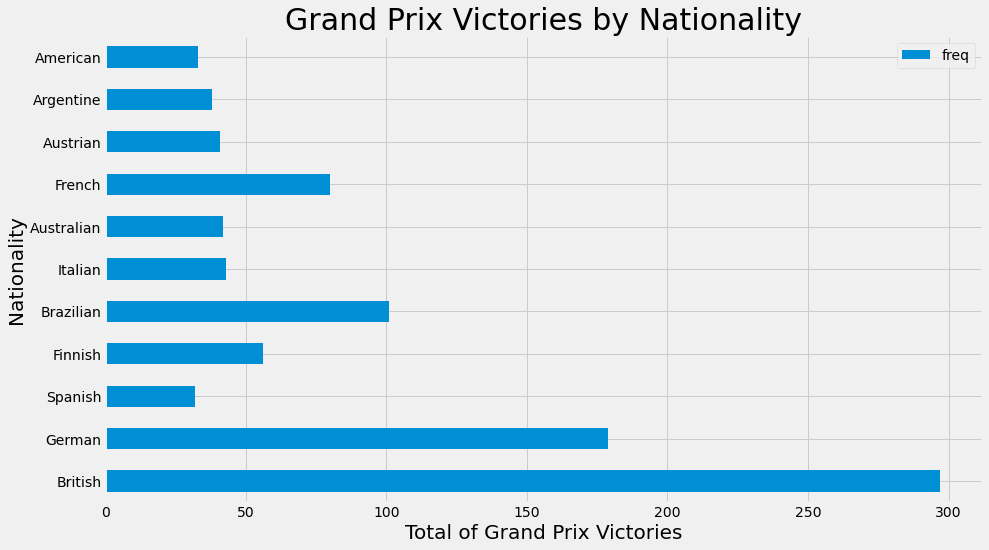

In [16]:
#Grand Prix Victories by Nationality graphic

ax = nationality2.plot.barh(x='nationality', y='freq', figsize=(14, 8))


plt.title("Grand Prix Victories by Nationality",fontsize=30)
plt.ylabel('Nationality',fontsize = 20)
plt.xlabel('Total of Grand Prix Victories',fontsize = 20,)
plt.show()

In [17]:
#Grand Prix Victories by Driver

gb = pd.merge(df_results, df_drivers, on='driverId',how='inner')
gb1 = gb.loc[gb['positionOrder']==1]
gb1['freq']=gb1.groupby(by='fullName')['positionOrder'].transform('count').sort_values()
gb1 = gb1[gb1["freq"] >20 ]
gb2 = gb1.drop_duplicates(subset=['fullName'])

gb2.head()

,raceId,driverId,constructorId,positionOrder,points,fastestLapTime,statusId,driverRef,forename,surname,dob,nationality,fullName,freq
0,18,1,1,1,10.0,87.5,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,92
556,862,3,131,1,25.0,101.0,1,rosberg,Nico,Rosberg,6/27/1985,German,Nico Rosberg,23
666,32,4,4,1,10.0,105.8,1,alonso,Fernando,Alonso,7/29/1981,Spanish,Fernando Alonso,32
1142,19,8,6,1,10.0,95.4,1,raikkonen,Kimi,RÃ¤ikkÃ¶nen,10/17/1979,Finnish,Kimi RÃ¤ikkÃ¶nen,21
3244,31,20,5,1,10.0,90.5,1,vettel,Sebastian,Vettel,7/3/1987,German,Sebastian Vettel,53


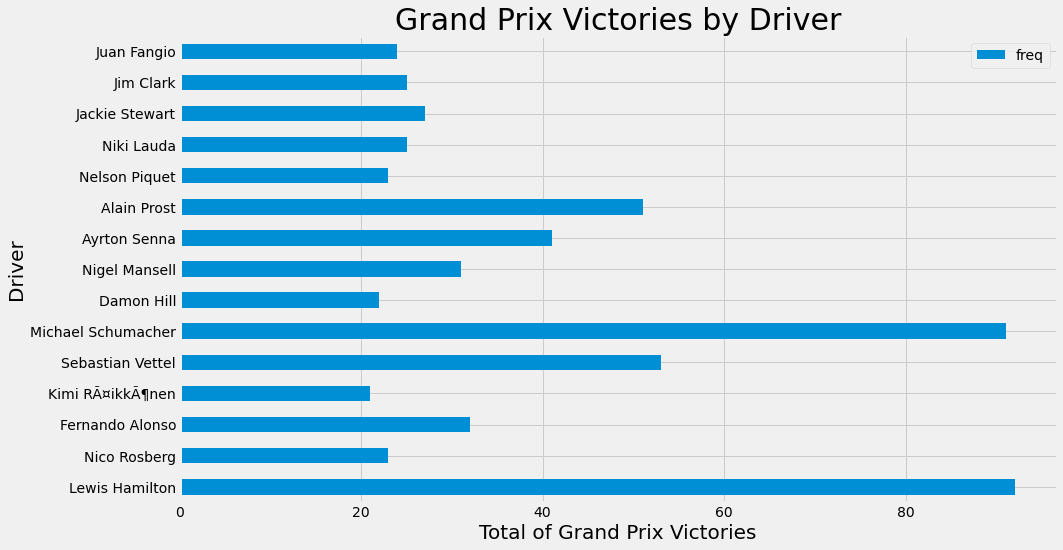

In [18]:
#Grand Prix Victories by Driver graphic

ax2 = gb2.plot.barh(x='fullName', y='freq', figsize=(14, 8))

plt.title("Grand Prix Victories by Driver",fontsize=30)
plt.ylabel('Driver',fontsize = 20)
plt.xlabel('Total of Grand Prix Victories',fontsize = 20,)
plt.show()

In [30]:
#Grand Prix Victories by Age

def calculate_age(born):
        born = datetime.datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

age = pd.merge(csv_results, csv_drivers, on='driverId',how='inner')
age['age'] = age['dob'].apply(calculate_age)

    
age = gb2
age['age'] = age['dob'].apply(calculate_age)
age['age_by_decade'] = pd.cut(x=age['age'], bins=[20,29,39,49,59,69,200], labels=['20s', '30s', '40s','50s','60s','70s +'])
age['freq_age']=age.groupby(by='age_by_decade')['positionOrder'].transform('count').sort_values()
#age = age[age["freq"] >20 ]
age2 = age.drop_duplicates(subset=['age_by_decade'])
age2.dropna()

age2.head()

,raceId,driverId,constructorId,positionOrder,points,fastestLapTime,statusId,driverRef,forename,surname,dob,nationality,fullName,freq,age,age_by_decade,freq_age
0,18,1,1,1,10.0,87.5,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,92,35,30s,4
1142,19,8,6,1,10.0,95.4,1,raikkonen,Kimi,RÃ¤ikkÃ¶nen,10/17/1979,Finnish,Kimi RÃ¤ikkÃ¶nen,21,41,40s,1
4470,56,30,6,1,10.0,84.6,1,michael_schumacher,Michael,Schumacher,1/3/1969,German,Michael Schumacher,91,51,50s,1
7122,203,71,17,1,10.0,0.0,1,damon_hill,Damon,Hill,9/17/1960,British,Damon Hill,22,60,60s,5
13935,430,182,1,1,9.0,0.0,1,lauda,Niki,Lauda,2/22/1949,Austrian,Niki Lauda,25,71,70s +,4


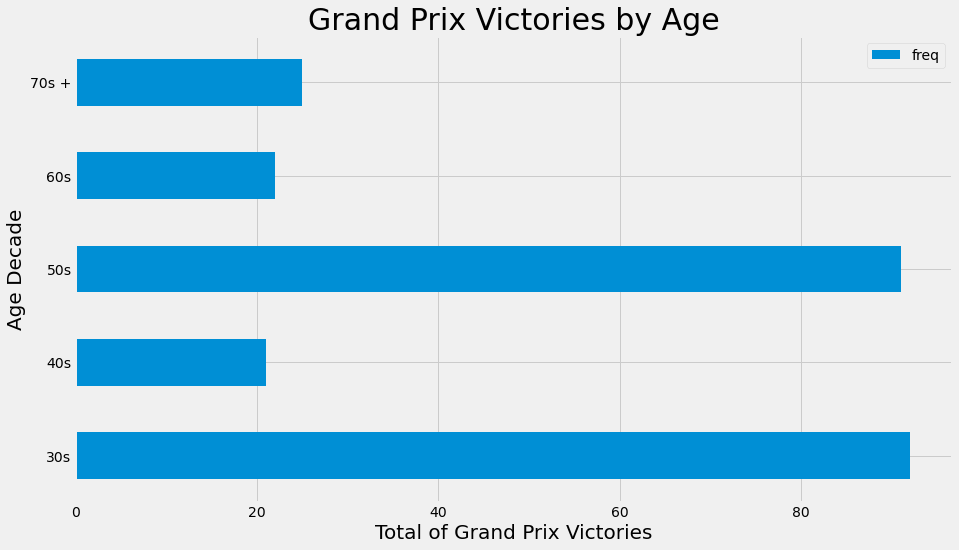

In [31]:
#Grand Prix Victories by Age graphic

ax2 = age2.plot.barh(x='age_by_decade', y='freq', figsize=(14, 8))

plt.title("Grand Prix Victories by Age",fontsize=30)
plt.ylabel('Age Decade',fontsize = 20)
plt.xlabel('Total of Grand Prix Victories',fontsize = 20,)
plt.show()

In [10]:
#Total Points by Nationality

nationality3 = pd.merge(df_results, df_drivers, on='driverId',how='inner')
nationality3['ttl_points']=nationality3.groupby(by='nationality')['points'].transform('sum').sort_values()
nationality3 = nationality3[nationality3["ttl_points"] >350 ]
nationality4 = nationality3.drop_duplicates(subset=['nationality'])


nationality4.head()

,raceId,driverId,constructorId,positionOrder,points,fastestLapTime,statusId,driverRef,forename,surname,dob,nationality,fullName,ttl_points
0,18,1,1,1,10.0,87.5,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,9268.14
262,18,2,2,2,8.0,87.7,1,heidfeld,Nick,Heidfeld,5/10/1977,German,Nick Heidfeld,7839.50
652,18,4,4,4,5.0,88.6,1,alonso,Fernando,Alonso,7/29/1981,Spanish,Fernando Alonso,2307.00
966,18,5,1,5,4.0,87.4,1,kovalainen,Heikki,Kovalainen,10/19/1981,Finnish,Heikki Kovalainen,4056.50
1114,18,7,5,7,2.0,89.5,5,bourdais,SÃ©bastien,Bourdais,2/28/1979,French,SÃ©bastien Bourdais,3133.33


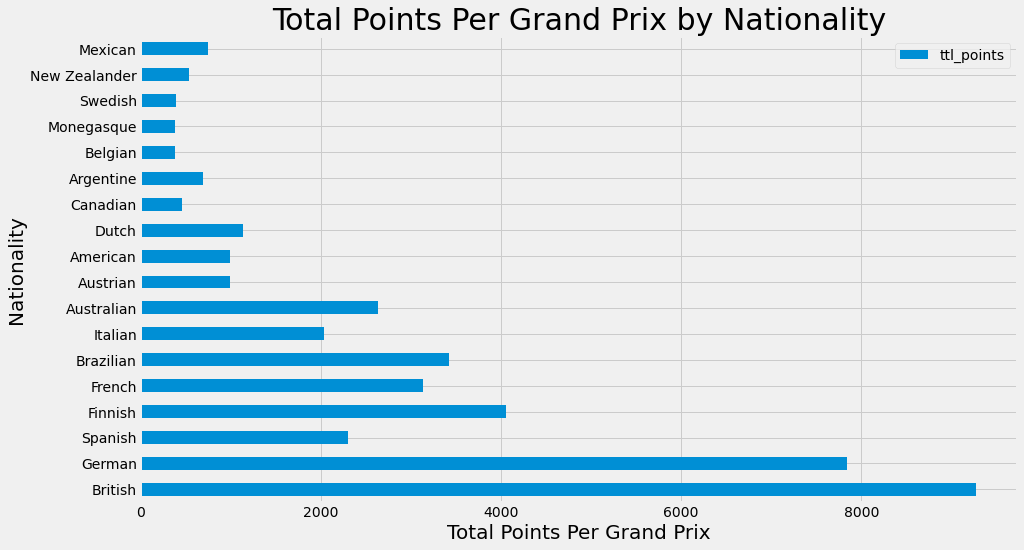

In [32]:
#Total Points by Nationality graphic


ax3 = nationality4.plot.barh(x='nationality', y='ttl_points', figsize=(14, 8))

plt.title("Total Points Per Grand Prix by Nationality",fontsize=30)
plt.ylabel('Nationality',fontsize = 20)
plt.xlabel('Total Points Per Grand Prix',fontsize = 20,)
plt.show()

In [33]:
#Total Points by Driver

gb4 = pd.merge(df_results, df_drivers, on='driverId',how='inner')
gb4['ttl_points']=gb4.groupby(by='fullName')['points'].transform('sum').sort_values()
gb4 = gb4[gb4["ttl_points"] >350 ]
gb5 = gb4.drop_duplicates(subset=['fullName'])


gb5.head()

,raceId,driverId,constructorId,positionOrder,points,fastestLapTime,statusId,driverRef,forename,surname,dob,nationality,fullName,ttl_points
0,18,1,1,1,10.0,87.5,1,hamilton,Lewis,Hamilton,1/7/1985,British,Lewis Hamilton,3687.0
446,18,3,3,3,6.0,88.1,1,rosberg,Nico,Rosberg,6/27/1985,German,Nico Rosberg,1594.5
652,18,4,4,4,5.0,88.6,1,alonso,Fernando,Alonso,7/29/1981,Spanish,Fernando Alonso,1899.0
1141,18,8,6,8,1.0,87.9,5,raikkonen,Kimi,RÃ¤ikkÃ¶nen,10/17/1979,Finnish,Kimi RÃ¤ikkÃ¶nen,1861.0
1779,18,13,6,13,0.0,88.2,5,massa,Felipe,Massa,4/25/1981,Brazilian,Felipe Massa,1167.0


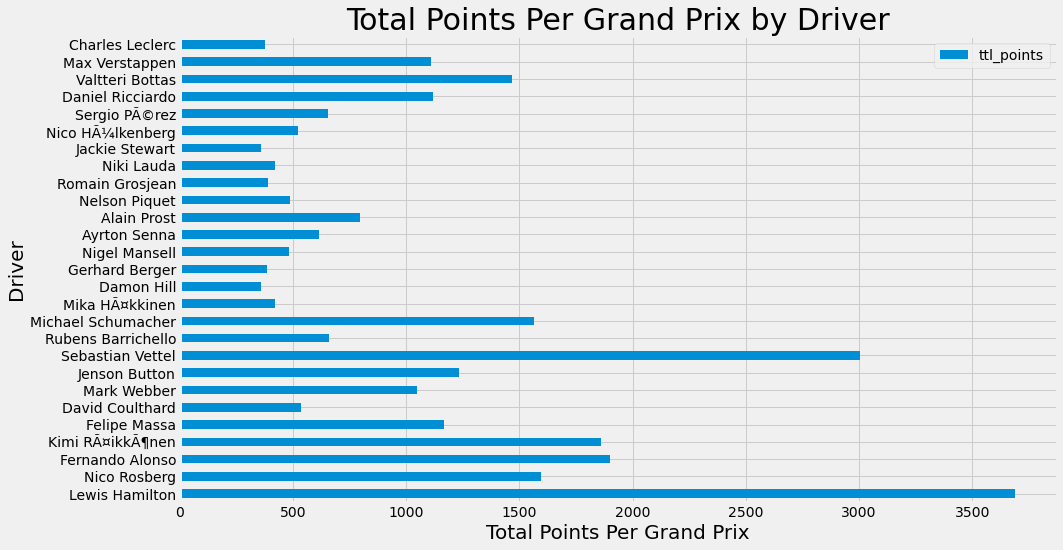

In [34]:
#Total Points by Driver Graphic


ax4 = gb5.plot.barh(x='fullName', y='ttl_points', figsize=(14, 8))

plt.title("Total Points Per Grand Prix by Driver",fontsize=30)
plt.ylabel('Driver',fontsize = 20)
plt.xlabel('Total Points Per Grand Prix',fontsize = 20,)
plt.show()

In [ ]:
#Total Points by Age 
